In [2]:
%%capture
!pip3 install qiskit

# Homework \#2

In [1]:
import numpy as np
import qiskit as qk
from sympy import *

In [3]:
with open('./token', 'r') as token_file:
    token = token_file.read()

In [4]:
%%capture
qk.IBMQ.save_account(token, overwrite = True)
qk.IBMQ.load_account()

In [5]:
provider = qk.IBMQ.get_provider(hub = 'ibm-q')

In [6]:
devices = provider.backends(filters=lambda x: (3 <= x.configuration().n_qubits <= 5) and not x.configuration().simulator)

In [7]:
devices

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
simd_backend = qk.Aer.get_backend('qasm_simulator')

## Task \#1

Firstly we should take a look on the following equation:
$$\hat H \vert x \rangle = \frac{1}{\sqrt 2} \left\{ \vert 0 \rangle + (-1)^{x} \vert 1 \rangle\right\}$$.
Thus we can apply it as it is prescripted in Deutch's algorithm: 
$$\hat{H}_x \hat{H}_y \hat{U}_f \hat{H}_x \vert 0 \rangle_x \otimes \vert 0 \rangle_y = \hat{H}_x \hat{H}_y \hat{U}_f \frac{1}{\sqrt 2} (\vert 0 \rangle_x \otimes \vert 0 \rangle_y + \vert 1 \rangle_x \otimes \vert 0 \rangle_y)$$
Oracle gives us by definition:
$$=\hat{H}_x \hat{H}_y \frac{1}{\sqrt 2} (\vert 0 \rangle_x \otimes \vert f(0) \rangle_y + \vert 1 \rangle_x \otimes \vert f(1) \rangle_y) = \hat{H}_x \frac{1}{2} (\vert 0 \rangle_x \otimes \vert f(0) \rangle_y + \vert 1 \rangle_x \otimes \vert f(0) \rangle_y + \vert 0 \rangle_x \otimes \vert f(1) \rangle_y - \vert 1 \rangle_x \otimes \vert f(1) \rangle_y) = \frac{1}{2 \sqrt 2 } \left(\vert 0 \rangle_x \otimes ( \vert 0 \rangle_y + (-1)^{f(0)} \vert 1 \rangle_y) + \vert 1 \rangle_x \otimes (\vert 0 \rangle_y +(-1)^{f(0)}  \vert 1 \rangle_y)+ \vert 0 \rangle_x \otimes (\vert 0 \rangle_y + (-1)^{f(1)} \vert 1 \rangle_y) - \vert 1 \rangle_x \otimes (\vert 0 \rangle_y + (-1)^{f(1)} \vert 1 \rangle_y\right)$$
It can be written in shorter form since some terms can be removed:
$$ = \frac{1}{\sqrt 2} \left\{
    \begin{aligned}
        \vert 0 \rangle_x \vert 0 \rangle_y + (-1)^{f(0)} \vert 0 \rangle_x \vert 1 \rangle_y & & f(0) = f(1)\\
        \vert 0 \rangle_x \vert 0 \rangle_y + (-1)^{f(0)} \vert 1 \rangle_x \vert 1 \rangle_y & & f(0) \neq f(1)
    \end{aligned}
    \right.
$$
Thus we can see that probability to measure zero state is $P(\vert 0 \rangle_x \vert 0 \rangle_y) = \frac{1}{2}$ and we can't extract any data from it. On the other hand we can use info about measurements of other qubits: $P(\vert 0 \rangle_x \vert 1 \rangle_y) = \frac{1}{2},~f(0)=f(1)$ or $P(\vert 1 \rangle_x \vert 1 \rangle_y) = \frac{1}{2},~f(0)\neq f(1)$. It gives us enough info about structure of function. 

## Task \#2

### Sub-Task \#1

We need to prove identity for tensor product of Hadamar's operators:
$$\hat{H}^{\otimes n} \vert \pmb{x} \rangle = \frac{1}{\sqrt{2^n}} \sum_{\pmb z} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$
Or it can be written in form of operator equality using Dirac's notation:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{\pmb z, \pmb x} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle \langle \pmb{x} \vert$$

First of all let's write Hadamar's operator for one qu-bit:
$$\hat{H} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \sum_{x_1,y_1} (-1)^{\pmb{x}_1 \pmb{z}_1} \vert \pmb{x}_1 \rangle \langle \pmb{z}_1 \vert$$
Now we can expand tensor product explicitly:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \left\{ \sum_{x_1,y_1} (-1)^{{x}_1 {z}_1} \vert {x}_1 \rangle \langle {z}_1 \vert \right\} \otimes \left\{ \sum_{x_2,y_2} (-1)^{{x}_2 {z}_2} \vert {x}_2 \rangle \langle {z}_2 \vert \right\} \otimes \cdots \otimes \left\{ \sum_{x_n,y_n} (-1)^{{x}_n {z}_n} \vert {x}_n \rangle \langle {z}_n \vert \right\}$$
Multiplying and re-arranging bras & kets we get:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x_1,\cdots,x_n \vert y_1,\cdots,y_n} (-1)^{x_1 y_1} \cdot (-1)^{x_n y_n} \cdot \left\{\vert {x}_1 \rangle \otimes \cdots \otimes \vert {x}_n \rangle\right\} \left\{\langle {z}_1 \vert \otimes \cdots \otimes \langle {z}_n \vert\right\}$$
That form is equal to the target one.

### Sub-Task \#3

The following identity should be proven (assuming $\pmb{s}^\perp=\{(\pmb x \oplus \pmb y) \cdot \pmb z = 0\}$):
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb x \rangle + \vert \pmb y \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z\in \pmb{s}^{\perp}} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$

Let's write $\vert \pmb x \rangle + \vert \pmb y \rangle = \vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle$. Thus, using previous identity:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z} \{(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\} \vert \pmb z \rangle$$

Since $(-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\} = (-1)^{\pmb{x}_0 \cdot \pmb z} \cdot (-1)^{\pmb{a} \cdot \pmb z}$ we have:
$$(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z} = 
    \left\{
    \begin{aligned}
        &0 & &\pmb a \cdot \pmb z = 1\\
        &2 (-1)^{\pmb {x}_0 \cdot \pmb z} & & \pmb a \cdot \pmb z = 0
    \end{aligned}
    \right.$$

Thus, we can write:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n-1}}} \sum_{\pmb a \cdot \pmb z = 0} (-1)^{\pmb{x}_0 \cdot \pmb z} \vert \pmb z \rangle$$

It's exatly what we want to get but with re-defined symbols. 

## Task \#3

First of all let's construct circuit for Simon's algorithm with $n = 1,~x=1,~a=111$:

In [9]:
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

In [10]:
a = '111'
n = len(a)
simon_circuit = qk.QuantumCircuit(n * 2, n)
simon_circuit.h(range(n))  
simon_circuit.barrier()
simon_circuit += simon_oracle(a)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
results = qk.execute(simon_circuit, backend = simd_backend, shots = 8192).result()
counts = results.get_counts()

In [11]:
simon_circuit.draw()

┌───┐ ░                                ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■──────────────■────■────■───░─┤ H ├┤M├──────
     ├───┤ ░   │              │    │    │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────┼────┼────┼───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼──┤ X ├──┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  └───┘┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼───────┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐     └───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├──────────┤ X ├─░───────╫──╫──╫─
           ░           └───┘          └───┘ ░       ║  ║  ║ 
c: 3/═══════════════════════════════════════════════╩══╩══╩═
                                                    0  1  2

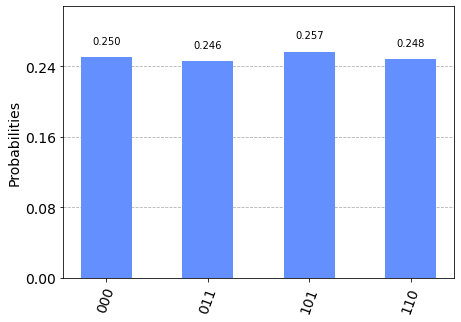

In [12]:
plot_histogram(counts)

In [13]:
from qiskit import Aer

In [14]:
aer_backend = Aer.get_backend('unitary_simulator')

In [15]:
prepare_circuit = qk.QuantumCircuit(n * 2, n)
prepare_circuit.h(range(n))  
prepare_circuit.barrier()
prepare_circuit += simon_oracle(a)
prepare_circuit.barrier()
prepare_circuit.h(range(n))
prep_results = qk.execute(prepare_circuit, backend = aer_backend).result()

In [16]:
prepare_circuit.draw()

┌───┐ ░                                ░ ┌───┐
q_0: ┤ H ├─░───■──────────────■────■────■───░─┤ H ├
     ├───┤ ░   │              │    │    │   ░ ├───┤
q_1: ┤ H ├─░───┼────■─────────┼────┼────┼───░─┤ H ├
     ├───┤ ░   │    │         │    │    │   ░ ├───┤
q_2: ┤ H ├─░───┼────┼────■────┼────┼────┼───░─┤ H ├
     └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │    │   ░ └───┘
q_3: ──────░─┤ X ├──┼────┼──┤ X ├──┼────┼───░──────
           ░ └───┘┌─┴─┐  │  └───┘┌─┴─┐  │   ░      
q_4: ──────░──────┤ X ├──┼───────┤ X ├──┼───░──────
           ░      └───┘┌─┴─┐     └───┘┌─┴─┐ ░      
q_5: ──────░───────────┤ X ├──────────┤ X ├─░──────
           ░           └───┘          └───┘ ░      
c: 3/══════════════════════════════════════════════

In [17]:
simon_matrix = prep_results.get_unitary(prepare_circuit, decimals = 1)
simon_matrix

array([[ 2.5000000e-01-4.59242550e-17j,  6.9388939e-17+4.59242550e-17j,
         6.9388939e-17+4.59242550e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.9388939e-17+4.59242550e-17j,  2.5000000e-01-7.65404249e-17j,
         2.5000000e-01-7.65404249e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.9388939e-17+4.59242550e-17j,  2.5000000e-01-7.65404249e-17j,
         2.5000000e-01-7.65404249e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       ...,
       [ 0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j, ...,
         2.5000000e-01-1.07156595e-16j,  2.5000000e-01-1.07156595e-16j,
        -6.9388939e-17+4.59242550e-17j],
       [ 0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+0

In [18]:
simon_matrix.shape

(64, 64)

In [19]:
simon_matrix = np.matrix.round(simon_matrix, decimals = 5)

In [20]:
simon_matrix

array([[ 0.25-0.j,  0.  +0.j,  0.  +0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.25-0.j,  0.25-0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.25-0.j,  0.25-0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       ...,
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.25-0.j,  0.25-0.j,
        -0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.25-0.j,  0.25-0.j,
        -0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ..., -0.  +0.j, -0.  +0.j,
         0.25-0.j]])

In [21]:
init_state = np.zeros(64)
init_state[0] = 1.
simon_vec = simon_matrix @ init_state
simon_res = np.real(simon_vec * np.conjugate(simon_vec))

In [22]:
sum(simon_res)

1.0

In [23]:
simon_res

array([0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [24]:
def to_str(snum, num_len = 64):
    snum_rep = "{0:b}".format(snum)
    return '0' * (num_len - len(snum_rep)) + snum_rep

In [25]:
def prob_num(num, res, num_mask = 8, num_len = 64):
    assert len(res.shape) == 1
    num_rep = to_str(num)
    acc = 0.
    for i, e in enumerate(res):
        i_rep = to_str(i, num_len = num_len)
        acc += 4 * (e if i_rep[::-1][:num_mask] == num_rep[::-1][:num_mask] else 0)
    return acc

In [26]:
def probs(nbit, res):
    nbit = int(nbit)
    return prob_num(1 << nbit, res)

In [27]:
res = [prob_num(i, simon_res) for i in range(8)]

In [28]:
res, sum(res)

([0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0], 1.0)

It proves results of simulation. Only $000, 011,101, 110$ vectors can be result of this circuit. Moreover they have equal possibility to be realized.

In [29]:
vecs = [np.array([0, 0, 0], dtype = 'bool'), np.array([0, 1, 1], dtype = 'bool'), np.array([1, 0, 1], dtype = 'bool'), np.array([1, 1, 0], dtype = 'bool')]

Let's iterate over all possible sets of numbers and check if system is solvable:

In [30]:
n_zero, n_ones = 0, 0
mat = np.zeros((3, 4))
for v0 in vecs:
    mat[:, 0] = v0[:]
    for v1 in vecs:
        mat[:, 1] = v1[:]
        for v2 in vecs:
            mat[:, 2] = v2[:]
            for v3 in vecs:
                mat[:, 3] = v3[:]
                smat0, smat1 = mat[:,:-1], mat[:,1:]
                d0, d1 = np.linalg.det(smat0), np.linalg.det(smat1)
                is_suitable = bool(d0) | bool(d1)
                print(d0, d1, is_suitable)
                if is_suitable:
                    n_ones += 1
                else:
                    n_zero += 1

0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 -2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 -2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 -2.0 True
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 False
0.0 0.0 F

In [31]:
n_zero, n_ones

(214, 42)

This results $42 / 256$ are even better than naive estimation that gives success/error ratio about: 
$1 - \frac{7}{8} \frac{15}{16}$.

## Task \#4 

### Sub-Task \#1

Actually Grover's search algorithm is based on the amplitude amplification technique. In basic words it's an iterative algorithm that increases probability to find right answer on every step. 

Actually it can be decomposed in the following way:
1. Initial state preparation by Hadamar's operators. $\vert s \rangle = \hat{H}^{\otimes (n+1)} \vert 0 \rangle$. After this stage stet vector is distrubuted uniformly.
2. Oracle's reflection. It reflects state around plane orthogonal to target vector $\vert w \rangle$: $ \vert s \rangle = \sin \theta \vert w \rangle + \cos \theta \vert s' \rangle$.
3. After-reflection that moves state towards the target one rotatin it around $\vert s \rangle$. $2\vert s \rangle \langle s \vert - 1$.

We can repeat it to increase probability to find answer.

### Sub-Task \#2

Let's create 2-QBits Grover's algorithm with tarket state $\vert w\rangle = \vert 11 \rangle$. That implies Oracle in form of CZ gate. Thus:

In [32]:
qc = qk.QuantumCircuit(2, 2)
#Preparation
qc.h(range(2))
#Oracle
qc.cz(0, 1)
#Grover's diffusion
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.measure(range(2), range(2))

In [33]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘   └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

In [34]:
res = qk.execute(qc, shots = 65536, backend = simd_backend).result()

In [35]:
stt = res.get_counts()

In [36]:
stt

{'11': 65536}

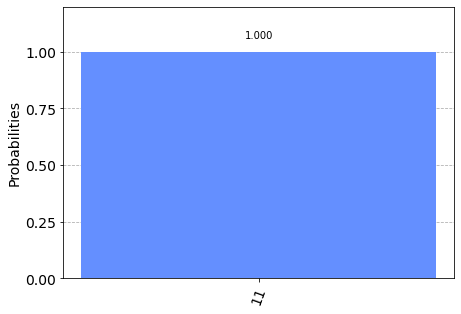

In [37]:
plot_histogram(stt)

Thus Grover's algorithm is performed once and gives right answer 

### Sub-Task \#3 

In [38]:
qc = qk.QuantumCircuit(2, 2)
qc.h(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.cz(0, 1)
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.measure(range(2), range(2))

In [39]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░    ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ │ ├───┤├───┤ │ ├───┤ ░  │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘   └───┘└───┘   └───┘ ░    └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════════╩══╩═
                                                           0  1

In [40]:
res = qk.execute(qc, shots = 65536, backend = simd_backend).result()

In [41]:
stt = res.get_counts()

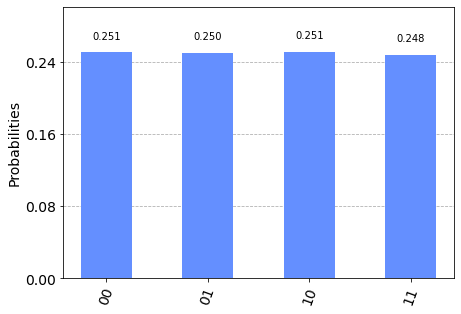

In [42]:
plot_histogram(stt)

It disperses probabilities across all qbits.